## Plotting earthquakes

Source: http://introtopython.org/visualization_earthquakes.html

Earthquake data available at: http://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php

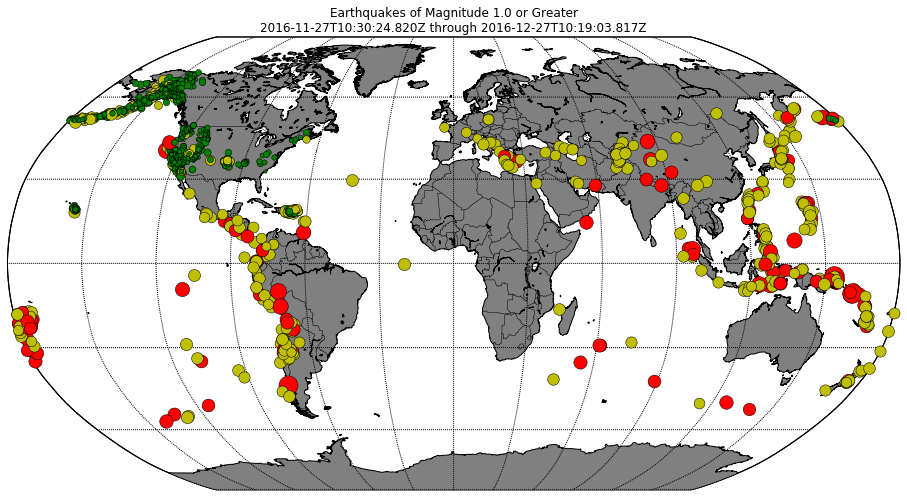

In [8]:
import csv

# Open the earthquake data file.
filename = 'earthquakes.csv'

# Create empty lists for the latitudes and longitudes.
lats, lons = [], []
magnitudes = []
timestrings = []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        magnitudes.append(float(row[4]))
        timestrings.append(row[0])

# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')

# Make this plot larger.
plt.figure(figsize=(16,12))

eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=0)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 2.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)

title_string = "Earthquakes of Magnitude 1.0 or Greater\n"
title_string += "%s through %s" % (timestrings[-1], timestrings[0])
plt.title(title_string)